# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

Алгоритм проекции (имени Крейнина Матвея и Солодкина Владимира из комнаты 377 Б):

0. Считаем l1 норму вектора x, если меньше или равно. то выдаем x, иначе переходим к шагу.
1. Смотрим на координаты вектора x, из них понимаем в какой квадрат d-мерном пространстве мы попали, из этого понимаем уравнение ближайшей гиперплоскости.
2. Из уравнения гиперплоскости мы знаем нормаль к ней, можем найти расстояние от точки x до нашей гиперплоскости.
3. Нашли расстояние $h = \frac{|(x-ro, n)|}{|n|}$, где (r0 = ($(-1)^l$, 0, ..., 0), а $l = sign(x_1)$), тогда можем найти в какой точке перпендикуляр из точки x пересекает нашу гиперплоскость.
4. Эта точка будет задаваться выражением: $y = x - h \cdot n$.
5. Вычисляем l1 норму вектора y, если он больше единицы, то составляем новый вектор меньшего подпространства из координат, которые не поменяли знак с координатами исходного вектора.
6. Вызовем алгоритм для новго вектора, пока его не станет единицей.

Замечание: у этого решение есть большие минусы, которые выявились на тестировании, а именно то, что в худшем случае алгоритм работате за $O(d^2)$ и по памяти, и по итерациям.

Поэтому было принято решение написать алгоритм из статьи, сл-но он и был написан.

Ссылка на статью: http://jitkomut.eng.chula.ac.th/pdf/projlp.pdf 


__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

Оператор $\text{prox}_C (x) = arg \min_{y \in \bold{R}^d} \left \{ \frac{1}{2} ||x - y||^2 + \lambda \mathbb{I}_C (y) \right \}$

Оператор $\text{proj}_C(x) = arg \min_{y \in C} ||x-y||^2$

Давайте рассмотрим, каак работает каждый из операторов.
1. Оператор prox работает следующим образом, мы как бы фиксируем точку x, и минимизируем с помощью y, если y будет не из множества C, то значение оператора будет бесконечно, если же y будет в С, то значение будет конечно, сл-но кандидаты в arg этой минимума это функции будут из C, т.к. в них значение конечно, а в других бесконечно.

2. Оператор proj работате схожим образом, он сразу минимизирует $||x-y||^2$, беря y из множества C. Это равно сильно тому, что минимизировать $\frac{1}{2} ||x - y||^2$.

Вывод: эти два оператора эквивалентны для любых $\lambda > 0$, т.к. при умножении на ноль или на $+\infty$ это ни на что не влияет. 

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

\begin{equation}
\min_{w \in \mathbb{R}^d} ||w^TX - y||^2, X - \text{ матрица из векторов}, y - \text{вектор из }\{y_i\}.
\end{equation}

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [4]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)

(8124, 112) (8124,)


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

Импортнули функцию train_test_split из sklearn, и разделили в отношении 4 к 1. Но вообще мы можем просто выбрать случайное количество индексов от 1 до n с вероятностью 20 \%, они пойдут в test, а другие в train.

In [5]:
#ответ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6499, 112) (6499,)
(1625, 112) (1625,)


__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

У нас есть функция потерь: $f(w) = \frac{1}{n}||w^TX - y||^2$, давайте найдем её Гессиан. 

$\frac{\partial^2 f}{\partial w^2} = \frac{2}{n} X^T \cdot X$

Теперь посчитаем численно его минимальное и максимальное собственные числа.

In [7]:
#ответ
n, k = X_train.shape
hessian = 2/n * X_train.T @ X_train
wb, vb = np.linalg.eigh(hessian)
print("Minimal eigenvalue: ", wb[0])
print("Maximal eigenvalue: ", wb[-1])

Minimal eigenvalue:  -3.168735668875253e-14
Maximal eigenvalue:  20.677110902977507


Понятно, что задача будет выпуклой, т.к. у нас квадрат евклидовой нормы это выпуклая функция, а внутри нормы стоит аффинная функция, поэтому их композиция будет выпуклой функцией.

$L = 20.67$

Формально функция потерь является сильно выпуклой функцией, но как мы поняли в прошлом задании, $\mu = 10^{-5}$ это будет плохо обусловленная матрица, а с $\mu = 10^{-12}$ будет совсем плохо обусловленная матрица, поэтому из теории считаем, что да, но на практике нет.

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

Мы решаем не сферического коня в вакууме, поэтому было посмотрено сколько различных ответов принимает вектор y, было замечено, что 1 и 2, сл-но у нас задача не регресии, а классификации с помощью линейной модели, поэтому была применена функция активации (np.round).

В качестве критерия сходимости было выбрано норма градиента функции потерь меньше небольшого числа $\varepsilon$. $|| \nabla f(w) || < \varepsilon$

In [8]:
#@title Класс линейной регрессии

import numpy as np
import scipy.linalg as la
from sklearn.metrics import accuracy_score

class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def __function(self, X, y, w, n):
        return 1/n * la.norm(w @ X.T - y, 2) ** 2

    def __grad_function(self, X, y, w, n):
        """
        Функция под
        """
        return 1/n * 2 * X.T @ (w @ X.T - y).T 
        
    def fit(self, X, y):
        """
        Функция подбора параметров линейной модели для квадратичной функции потерь.

        Input: 
        - X     : матрица объектов
        - y     : вектор ответов

        Returns: none.
        """

        n, k = X.shape
        wo = np.array([])
        X_train = X

        # Добавляем ещё столбец для константы
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            w0 = np.random.rand(k+1)
        else:
            w0 = np.random.rand(k)
        

        iter = int(10 ** 7)
        
        hessian = 2 / n * X_train.T @ X_train
        wb, vb = np.linalg.eigh(hessian)
        
        lr_func = lambda X, y, w, n: 1/wb[-1]
        
        error_criterion = lambda X, y, w, n: np.linalg.norm(self.__grad_function(X, y, w, n), 2)
        eps = 5*10e-5
        iter = 10e6
        self._w = self.__gradient_descent(self.__function, self.__grad_function,
                                            w0, lr_func,  iter, error_criterion, 
                                            X_train, y)
        
        return self
    

    def fit_errors(self, X, y):
        """
        Функция подбора параметров линейной модели для квадратичной функции потерь.

        Input: 
        - X     : матрица объектов
        - y     : вектор ответов

        Returns: none.
        """

        n, k = X.shape
        wo = np.array([])
        X_train = X

        # Добавляем ещё столбец для константы
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            w0 = np.random.rand(k+1)
        else:
            w0 = np.random.rand(k)
        
        hessian = 2 / n * X_train.T @ X_train
        wb, vb = np.linalg.eigh(hessian)
        
        lr_func = lambda X, y, w, n: 1/wb[-1]
        
        error_criterion = lambda X, y, w, n: np.linalg.norm(self.__grad_function(X, y, w, n), 2)
        eps = 5*10e-5
        iter = 10e4
        errors = []
        accuracies = []
        self._w = w0

        for it in range(int(iter // 1000)):
            self._w = self.__gradient_descent(self.__function, self.__grad_function, self._w,
                                            lr_func,  1000, error_criterion, X_train, y)
            
            error = error_criterion(X_train, y, self._w, 1000)
            #print("№ ", it * 1000, "; error = ", error)
            errors.append(error)

            accuracies.append(accuracy_score(y, np.round(self.predict(X))))
            if (error < eps):
                break
                        
        return errors, accuracies

    def fit_proj(self, X, y, radius):
        """
        Функция подбора параметров линейной модели для квадратичной функции потерь.

        Input: 
        - X     : матрица объектов
        - y     : вектор ответов

        Returns: none.
        """

        n, k = X.shape
        wo = np.array([])
        X_train = X
        self.radius = radius

        # Добавляем ещё столбец для константы
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            w0 = np.random.rand(k+1)
        else:
            w0 = np.random.rand(k)
        
        hessian = 2 / n * X_train.T @ X_train
        wb, vb = np.linalg.eigh(hessian)
        
        lr_func = lambda X, y, w, n: 1/wb[-1]
        
        error_criterion = lambda X, y, w, n: np.linalg.norm(self.__grad_function(X, y, w, n), 2)
        eps = 5*10e-5
        iter = 10e4
        errors = []
        accuracies = []
        self._w = w0

        for it in range(int(iter // 1000)):
            self._w = self.__gradient_descent_proj(self.__function, self.__grad_function, self._w,
                                            lr_func,  1000, error_criterion, X_train, y)
            
            error = error_criterion(X_train, y, self._w, 1000)
            #print("№ ", it * 1000, "; error = ", error)
            errors.append(error)

            accuracies.append(accuracy_score(y, np.round(self.predict(X))))
            if (error < eps):
                break
                        
        return errors, accuracies

    def predict(self, X):
        """
        Функция предсказания по признакам, уже натренированной модели.
        Input: 
        - X : объекты, по которым будем предксазывать

        Returns: предсказания на основе весов, ранее обученной линейной модели.
        """
        n, k = X.shape
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = self._w @ X_train.T

        return y_pred

    def get_weights(self):
        """
        Функция получения весов нашей линейной модели.

        Input: None.
        Returns: Параметры модели.
        """
        return self._w
    
    def proj(self, x0):
        rad = self.radius
        x = np.copy(x0)
        d = int (x0.shape[0]) + 1

        if (np.linalg.norm(x, 1) <= rad):
            lambd = 0
        else:
            x = np.absolute(x)
            x = np.append(x, 0)
            x = np.sort(x)

            x_first = np.flip(x)
            first = np.flip(np.cumsum(x_first))

            second = np.multiply( np.arange(d), x )

            third = x * (-d)

            forth = np.ones(d) * (-rad)

            g_deriv = 2 * ( first + second + third + forth )
            k  = np.min(np.where(g_deriv[1:] * g_deriv[:-1] <= 0))

            lambd = (first[k] - x[k] - rad) / (d - 1 - k) 

        y = np.zeros(d - 1)
        y[x0 <= -lambd] = x0[x0 <= -lambd] + lambd
        #
        #y[np.abs(x) < lambd] = x[np.abs(x) < lambd] * 0
        y[x0 >= lambd] = x0[x0 >= lambd] - lambd

        return y

    def __gradient_descent(self, f, grad_f, x0, 
                         lr, iter, error_criterion, 
                         X, y):
        """
        Это градиентный спуск.
        Он получает на вход целевую функцию, функцию градиента целевой функции, 
        начальную точку, функцию learning rate, количество итераций и 
        функцию подсчета ошибки. И применяетметод градиентного спуска.

        Inputs:
        - f                 : целевая функция, минимум которой мы хотим найти.
        - grad_f            : функция градиента целевой функции.
        - x0                : начальная точка.
        - lr                : функция learning rate.
        - iter              : количество итераций.
        - error_criterion   : функция подсчета ошибки
        - X_train           : множество объектов (матрица фичей)
        - y                 : вектор ответов

        Returns:
        Наилучшую минимальную точку, которую удалось найти.
        """
    
        w = x0
        eps = 5*10e-5
        n, k = X.shape 
        for k in range(iter):
            prev_w = w
            w = w - lr(X, y, w, n) * grad_f(X, y, w, n)
            
            error = error_criterion(X, y, w, n)

            if (error < eps):
                return w
        return w

    def __gradient_descent_proj(self, f, grad_f, x0, 
                         lr, iter, error_criterion, 
                         X, y):
        """
        Это модифицированный градиентный спуск, с проекций градиента на l1-шар
        Он получает на вход целевую функцию, функцию градиента целевой функции, 
        начальную точку, функцию learning rate, количество итераций и 
        функцию подсчета ошибки. И применяетметод градиентного спуска.

        Inputs:
        - f                 : целевая функция, минимум которой мы хотим найти.
        - grad_f            : функция градиента целевой функции.
        - x0                : начальная точка.
        - lr                : функция learning rate.
        - iter              : количество итераций.
        - error_criterion   : функция подсчета ошибки
        - X_train           : множество объектов (матрица фичей)
        - y                 : вектор ответов

        Returns:
        Наилучшую минимальную точку, которую удалось найти.
        """
    
        w = x0
        eps = 5*10e-5
        n, k = X.shape 
        for k in range(iter):
            prev_w = w
            w = w - lr(X, y, w, n) * self.proj(grad_f(X, y, w, n))
            
            error = error_criterion(X, y, w, n)

            if (error < eps):
                return w
        return w


In [9]:
linear_model = MyLinearRegression()
errors, accuracy = linear_model.fit_errors(X_train, y_train)

Text(0, 0.5, 'Логарифм ошибки')

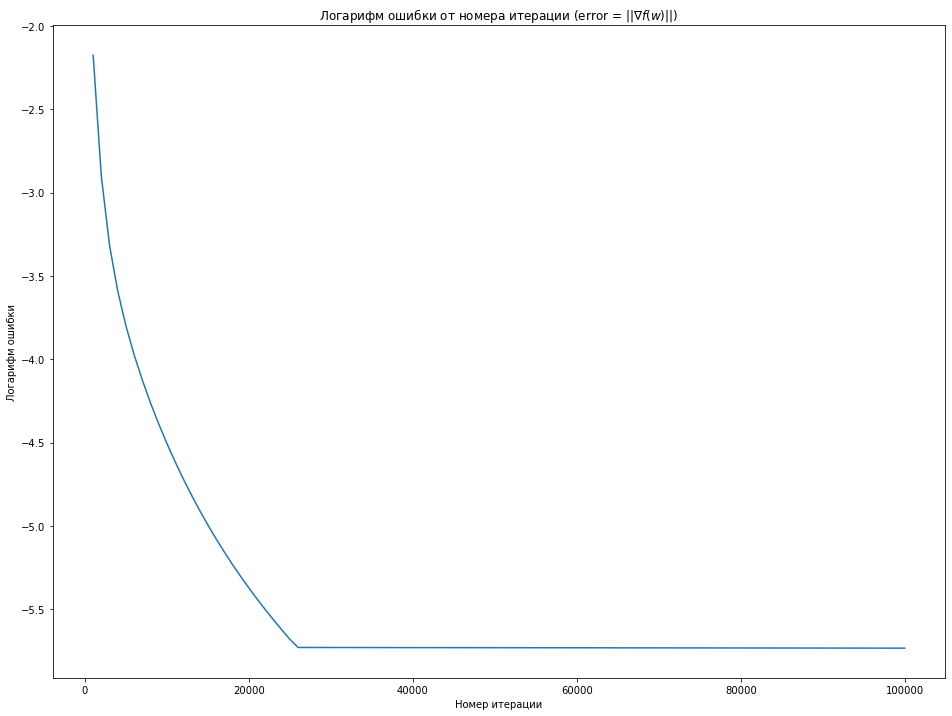

In [10]:
fig, ax = plt.subplots(figsize=(16,12))
iter = int(10e4)

x = np.linspace(1000, iter, len(errors))
y = np.array(errors)

ax.set_title("Логарифм ошибки от номера итерации (error = $||\\nabla f(w)||$)")
ax.plot(x, np.log(y))

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

В качестве сравнения была выбрана реализация Линейной регресии из sklearn и была применена функция активации np.round.

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)
y_pred_my = linear_model.predict(X_test)
y_pred_sklearn = np.round(y_pred_sklearn)
y_pred_my = np.round(y_pred_my)


r2_score_sklearn = r2_score(y_test, y_pred_sklearn)
r2_score_my = r2_score(y_test, y_pred_my)

mean_squared_error_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mean_squared_error_my = mean_squared_error(y_test, y_pred_my)

accuracy_score_sklearn = accuracy_score(y_test, y_pred_sklearn)
accuracy_score_my = accuracy_score(y_test, y_pred_my)

print("               : sklearn | my regresion")
print("R2 score       : %0.5f | %0.5f  " % (r2_score_sklearn, r2_score_my))
print("mean_scored    : %0.5f | %0.5f  " % (mean_squared_error_sklearn, mean_squared_error_my))
print("accuracy_score : %0.5f | %0.5f  " % (accuracy_score_sklearn, accuracy_score_my))

               : sklearn | my regresion
R2 score       : 1.00000 | 1.00000  
mean_scored    : 0.00000 | 0.00000  
accuracy_score : 1.00000 | 1.00000  


Text(0, 0.5, 'Логарифм ошибки')

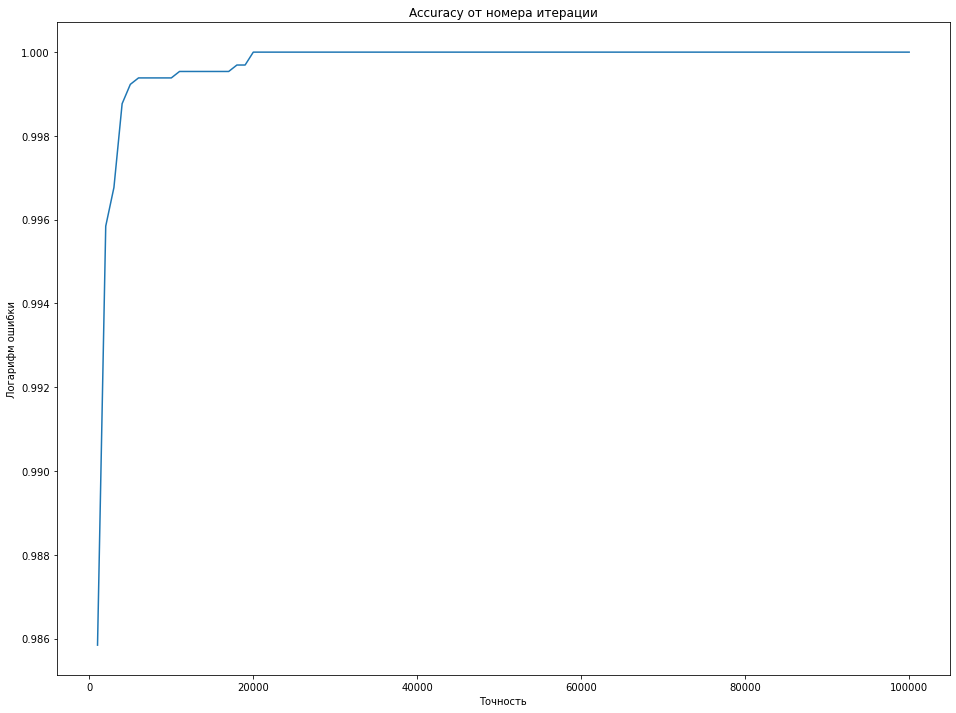

In [12]:
fig, ax = plt.subplots(figsize=(16,12))
iter = int(10e4)
x = np.linspace(1000, iter, len(accuracy))
y = np.array(accuracy)

ax.set_title("Accuracy от номера итерации")
ax.plot(x, y)

ax.set_xlabel("Точность")
ax.set_ylabel("Логарифм ошибки")

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [13]:
linear_model_proj = MyLinearRegression(True)


lambdas = [1, 2, 4, 8, 10, 15, 20]

errors = []
accuracy = []

for lamb in lambdas:
    er, ac = linear_model_proj.fit_proj(X_train, y_train, lamb)
    errors.append(er)
    accuracy.append(ac)

Text(0, 0.5, 'Логарифм ошибки')

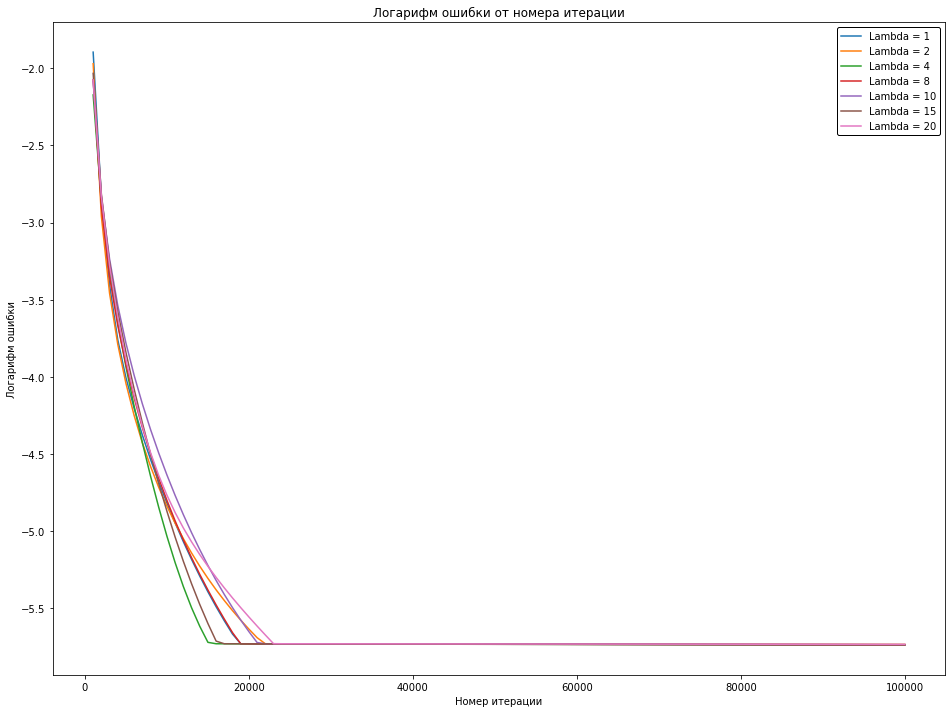

In [14]:
fig, ax = plt.subplots(figsize=(16,12))    

ax.set_title("Логарифм ошибки от номера итерации")

iter = 10e4
for i in range(len(lambdas)):
    er = errors[i]
    iter = int(10e4)
    x = np.linspace(1000, iter, len(er))
    y = er
    ax.plot(x, np.log(y), label="Lambda = %d" %(lambdas[i]))

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

In [1]:
fig, ax = plt.subplots(figsize=(16,12))    

ax.set_title("Accuracy от номера итерации")

for i in range(len(lambdas)):
    ac = accuracy[i]
    iter = int(10e4)
    x = np.linspace(1000, iter, len(ac))
    y = ac
    ax.plot(x, y, label="Lambda = %d" %(lambdas[i]))

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Точность")

NameError: name 'plt' is not defined

Видим, что быстрее всех сходится шар с $\lambda = 20$.

Но accuracy единица только на $lambda = 10, 15$, но на это не стоит ориентироваться, т.к. это зависит от начальной точки.

По сравнению с обычным градиентным спуском, есть выигрыш в количестве шагов, которое требуется для того, чтобы сойтись. В обычном порядка больше 20000 итераций, для $\lambda = 20$ нужно меньше 20.

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [16]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.4986626  0.53641086
 0.56906108 0.59689855 0.6237896  0.64579724]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

In [18]:
# ответ